# White Wine Machine Learning Model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
path = 'Resources/WhiteWine_dataset.csv'
white_wine_df1 = pd.read_csv(path)
white_wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
white_wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
white_wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# Check for null values
white_wine_df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Sort quality values
white_wine_df1['quality'].value_counts().sort_values() 

9       5
3      20
4     163
8     175
7     880
5    1457
6    2198
Name: quality, dtype: int64

In [7]:
# Check value counts
for col in white_wine_df1:
    print(white_wine_df1[col].value_counts(ascending=False), '\n')

6.8     308
6.6     290
6.4     280
6.9     241
6.7     236
       ... 
4.5       1
4.6       1
11.8      1
14.2      1
3.9       1
Name: fixed acidity, Length: 68, dtype: int64 

0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: volatile acidity, Length: 125, dtype: int64 

0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
1.23      1
0.86      1
0.11      1
0.99      1
Name: citric acid, Length: 87, dtype: int64 

1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
6.75       1
12.75      1
8.55       1
4.35       1
18.40      1
Name: residual sugar, Length: 310, dtype: int64 

0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: chlorides, Length: 160, dtype: int64 

29.0     160
31.0     132
26.0     129
35.0     129
34.0     128
 

In [8]:
# Show rows and columns of original dataset
white_wine_df1.shape

(4898, 12)

In [9]:
# Drop Duplicates
# Show rows and columns of updated dataset
white_wine=white_wine_df1.copy()
white_wine.drop_duplicates(subset=None,inplace=True)
white_wine.shape

(3961, 12)

In [10]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


###### No categorical variables found in dataset // All variables are qualitative

### Correlation Heatmap

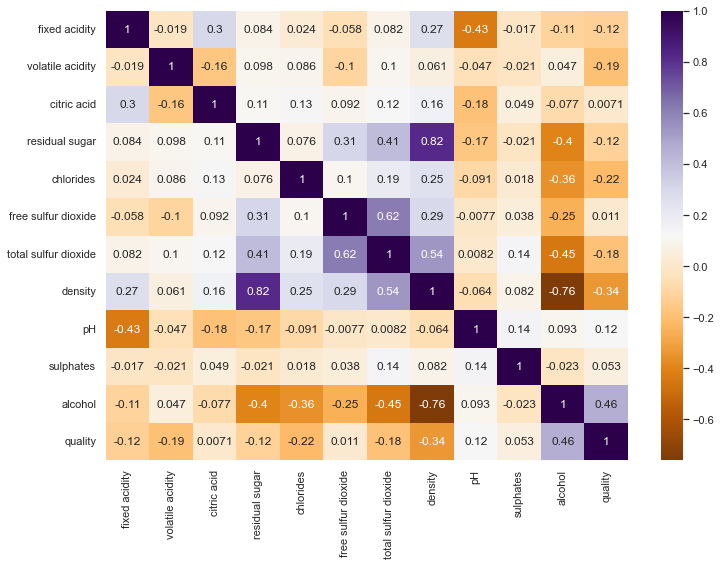

In [42]:
sns.heatmap(white_wine.corr(), annot=True,cmap='PuOr')
plt.show()

## Split the Data into Training and Testing

In [18]:
# Dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

np.random.seed(0)
df_train,df_test=train_test_split(white_wine,train_size=0.7,test_size=0.3,random_state=100)

In [19]:
# Create our features
X = white_wine[list(white_wine.columns)[:-1]]

# Create our target
y = white_wine['quality']

In [20]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [21]:
y.describe()

count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [22]:
y.value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [24]:
# Training model info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 1717 to 1834
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2772 non-null   float64
 1   volatile acidity      2772 non-null   float64
 2   citric acid           2772 non-null   float64
 3   residual sugar        2772 non-null   float64
 4   chlorides             2772 non-null   float64
 5   free sulfur dioxide   2772 non-null   float64
 6   total sulfur dioxide  2772 non-null   float64
 7   density               2772 non-null   float64
 8   pH                    2772 non-null   float64
 9   sulphates             2772 non-null   float64
 10  alcohol               2772 non-null   float64
 11  quality               2772 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 281.5 KB


In [25]:
# Testing model info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1119 to 991
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1189 non-null   float64
 1   volatile acidity      1189 non-null   float64
 2   citric acid           1189 non-null   float64
 3   residual sugar        1189 non-null   float64
 4   chlorides             1189 non-null   float64
 5   free sulfur dioxide   1189 non-null   float64
 6   total sulfur dioxide  1189 non-null   float64
 7   density               1189 non-null   float64
 8   pH                    1189 non-null   float64
 9   sulphates             1189 non-null   float64
 10  alcohol               1189 non-null   float64
 11  quality               1189 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.8 KB


In [26]:
df_train.shape

(2772, 12)

In [27]:
df_test.shape

(1189, 12)

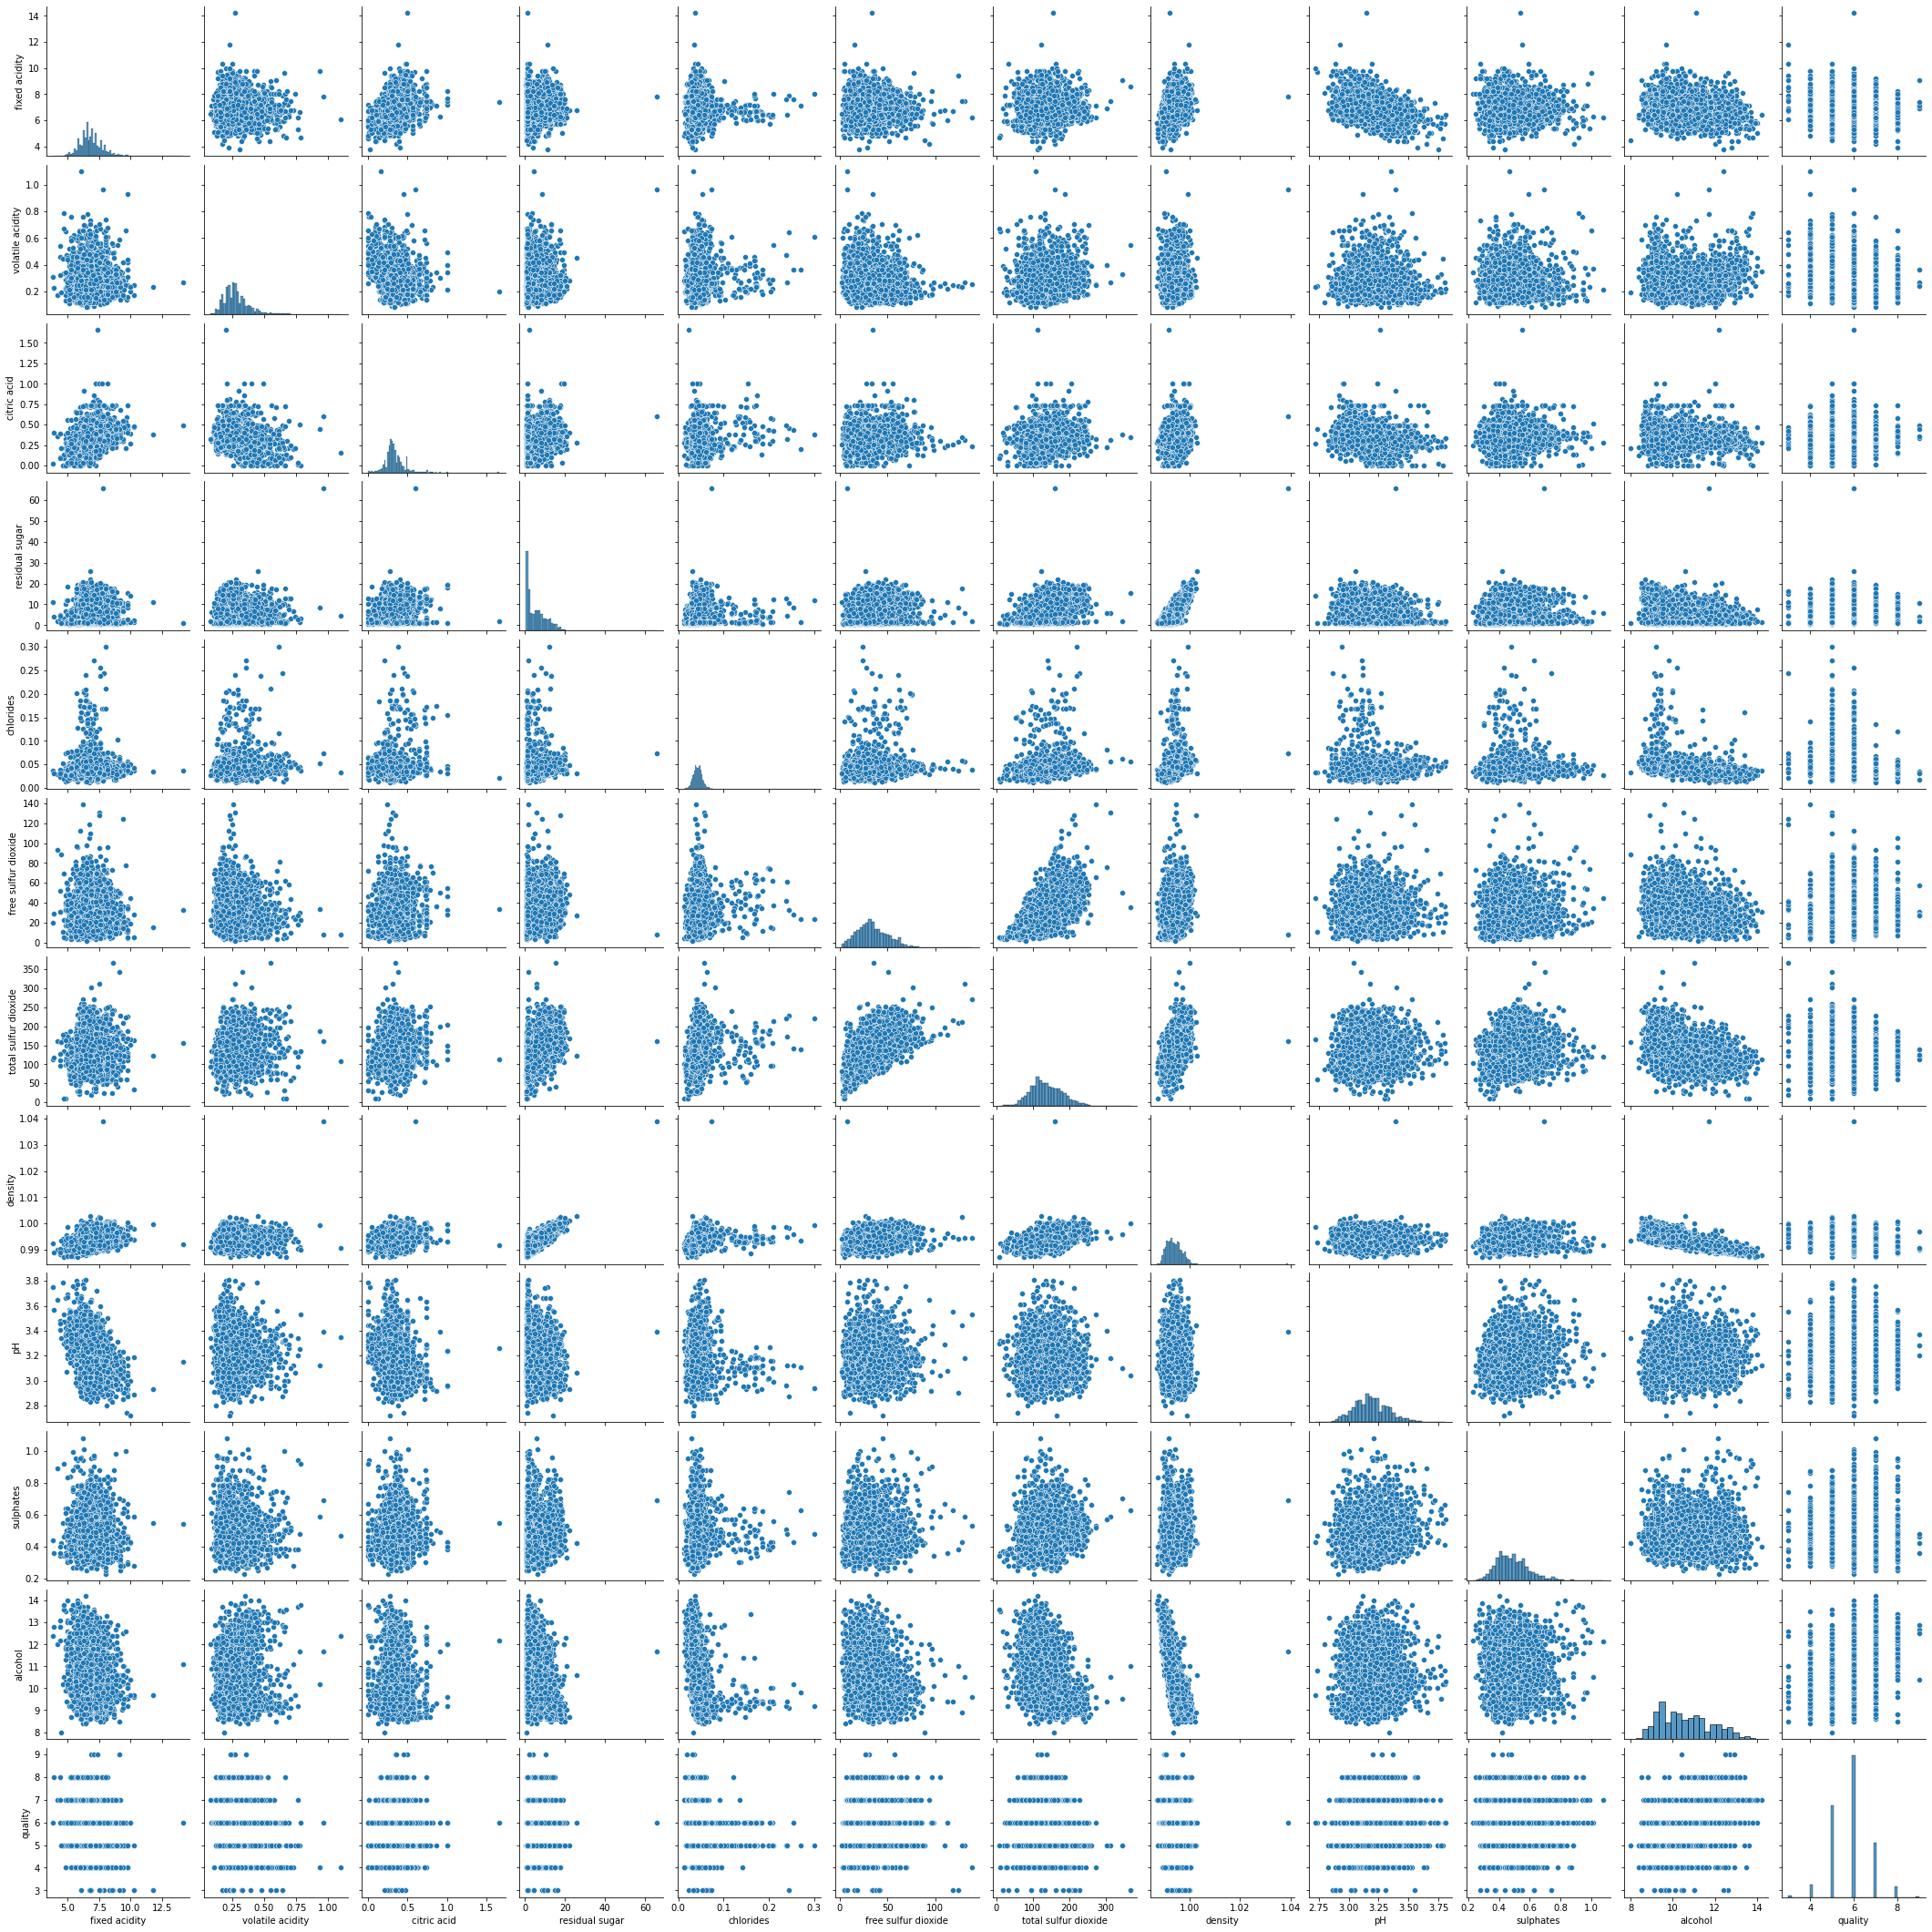

In [28]:
# Pairplot: see both distribution of single variables and relationships between two variables
sns.pairplot(df_train) 
plt.show()

## Rescaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1717,6.8,0.27,0.32,1.5,0.044,19.0,142.0,0.9921,3.10,0.43,9.9,6
671,6.6,0.28,0.36,1.7,0.038,22.0,101.0,0.9912,3.29,0.57,11.6,6
1719,5.8,0.23,0.27,1.8,0.043,24.0,69.0,0.9933,3.38,0.31,9.4,6
813,6.5,0.26,0.32,16.5,0.045,44.0,166.0,1.0000,3.38,0.46,9.5,6
304,7.3,0.41,0.24,6.8,0.057,41.0,163.0,0.9949,3.20,0.41,9.9,6


In [30]:
df_train[:]=scaler.fit_transform(df_train[:])
df_train.head()

/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1717,0.288462,0.186275,0.192771,0.013804,0.110727,0.124542,0.372028,0.096202,0.348624,0.235294,0.306452,0.5
671,0.269231,0.196078,0.216867,0.016871,0.089965,0.146520,0.257343,0.078851,0.522936,0.400000,0.580645,0.5
1719,0.192308,0.147059,0.162651,0.018405,0.107266,0.161172,0.167832,0.119337,0.605505,0.094118,0.225806,0.5
813,0.259615,0.176471,0.192771,0.243865,0.114187,0.307692,0.439161,0.248506,0.605505,0.270588,0.241935,0.5
304,0.336538,0.323529,0.144578,0.095092,0.155709,0.285714,0.430769,0.150183,0.440367,0.211765,0.306452,0.5


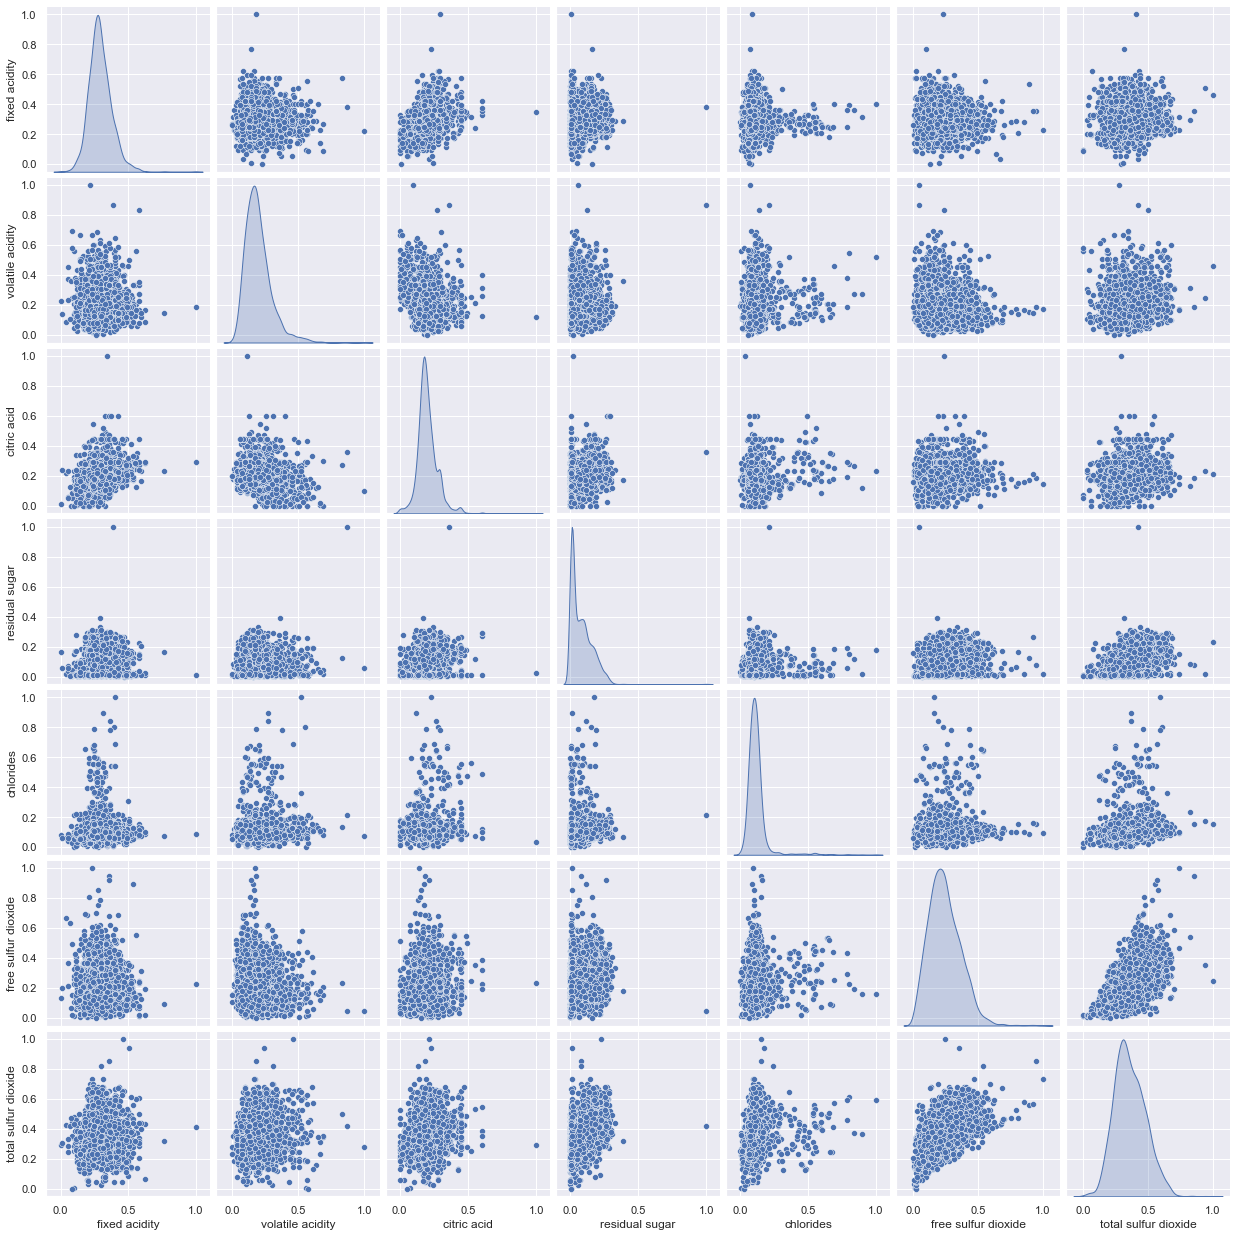

In [31]:
# Multi-Variate Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

## Linear Regression

In [32]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[7.0275546  5.87666039 5.39873232 ... 5.5003953  5.04855717 6.01231628]
[6.01975314 6.46182049 6.33282976 6.51873    5.27420864 6.14819292
 6.53087921 6.18558619 6.48079504 6.00728518 5.44459209 5.55401805
 6.02899218 6.36118791 5.35391599 6.41117243 6.41868714 6.83889857
 5.73011145 6.12727308 5.83199815 6.15118866 6.21214839 5.31102088
 5.55699885 6.0810195  5.87604515 6.01826045 6.47673395 5.32412571
 6.07882078 6.25811868 6.15752798 6.45766753 4.97241592 6.06833815
 6.47355566 5.99728511 6.27453995 5.98764966 6.27174566 5.99403222
 5.8102462  5.95467179 6.07027978 5.46469937 4.95328382 6.54363448
 5.0765102  5.74338449 5.27796361 6.10918064 5.26529446 6.31740018
 5.37833513 5.60497652 6.83225569 6.5798791  4.60807777 5.63001892
 6.1736941  5.6416092  5.69793291 5.25448489 5.76966995 5.93542189
 5.71525258 5.20372638 6.35534621 5.9033491  5.3611726  6.32041275
 5.09947444 5.8680569  5.24444557 5.13343679 6.17630016 5.25885814
 5.90001414 6.26989959 5.75234917 6.37751893 4.94105892 6

In [34]:
# calculating Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.7438632863435378
0.7500032171936848


In [35]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 6. 6. 7. 5. 6. 7. 6. 6. 6. 5. 6. 6. 6. 5. 6. 6. 7. 6. 6. 6. 6. 6. 5.
 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 7.
 5. 6. 5. 6. 5. 6. 5. 6. 7. 7. 5. 6. 6. 6. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6.
 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 7. 5. 5. 6. 6. 7. 6. 6. 5. 7. 5. 6.
 6. 6. 6. 6. 5. 5. 5. 6. 5. 5. 5. 6. 6. 6. 7. 7. 6. 6. 5. 7. 7. 5. 5. 6.
 6. 6. 6. 5. 5. 5. 7. 6. 7. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 6.
 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 7. 6. 5. 7. 6. 5. 7. 6. 6. 6. 6. 5. 6.
 6. 5. 6. 5. 7. 6. 6. 6. 6. 6. 7. 5. 6. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 5. 6. 6. 6. 7. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 5.
 6. 6. 6. 6. 6. 5. 7. 7. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5.
 7. 6. 6. 5. 7. 6. 6. 6. 5. 6. 5. 6. 6. 5. 5. 7. 6. 6. 6. 5. 7. 6. 6. 5.
 7. 6. 7. 6. 6. 5. 7. 7. 5. 6. 6. 6. 7. 5. 6. 7. 6. 6. 5. 6. 6. 7. 6. 6.
 5. 6. 7. 5. 6. 6. 6. 6. 6. 6. 6. 7. 5. 6. 5. 6. 5. 5. 6. 6. 5. 7. 5. 6.
 6. 6. 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 5. 6. 7. 7. 6.

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5870684937742447
Mean Squared Error: 0.5625048258008776
Root Mean Squared Error: 0.7500032171936848


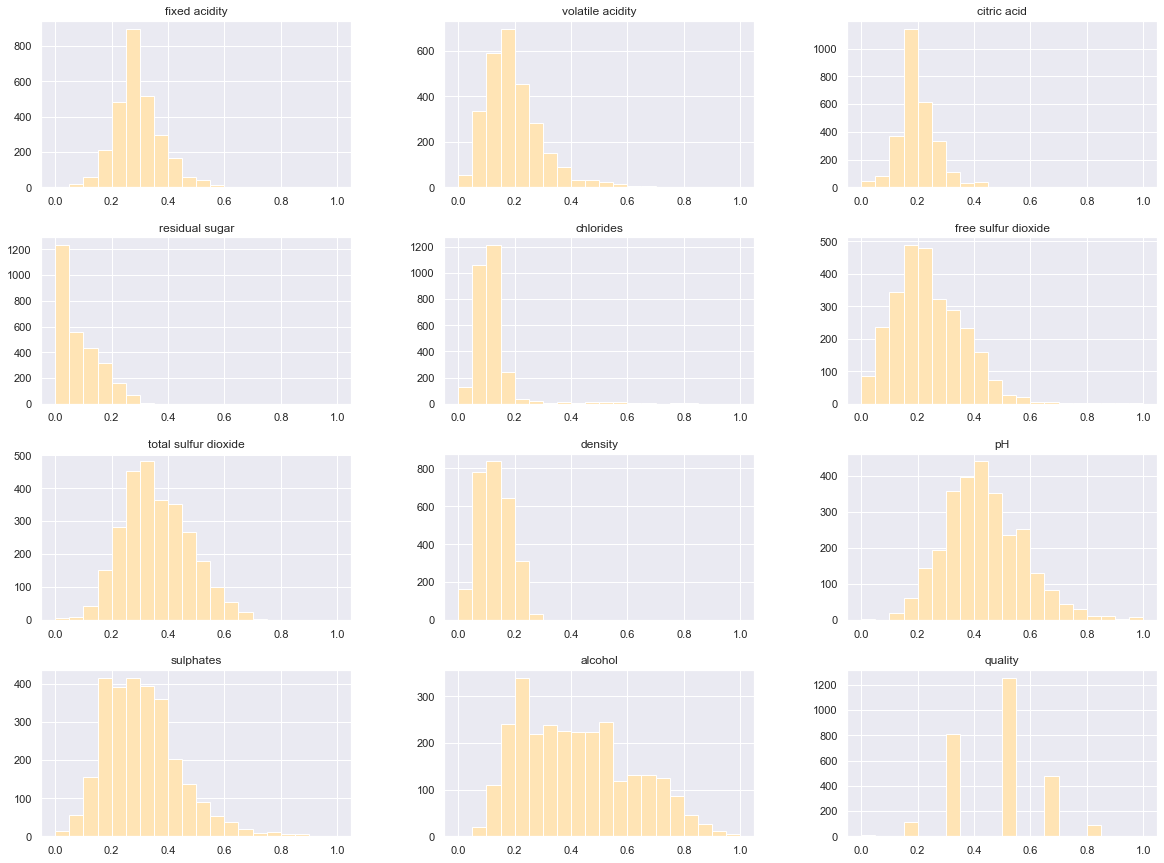

In [45]:
# Distributions of the variables / features
df_train.hist(figsize=(20,15),bins=20, color="moccasin")
plt.show()

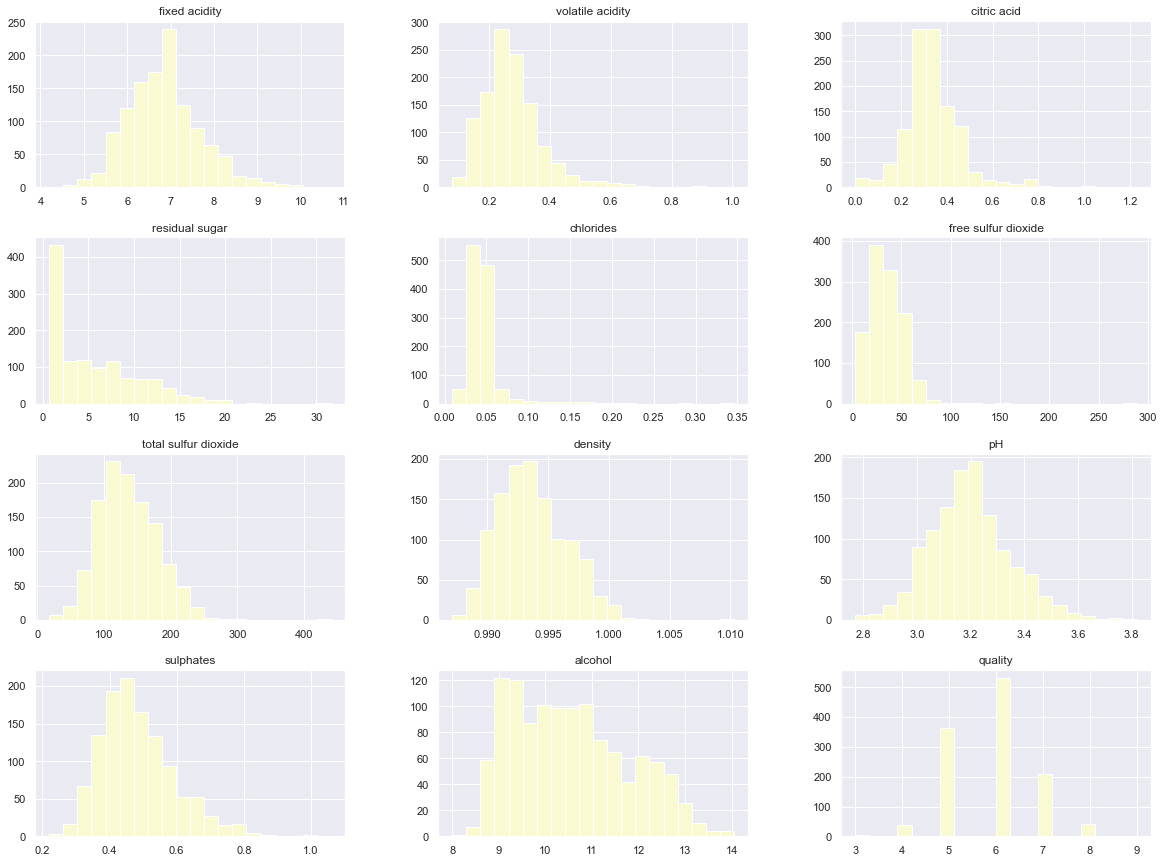

In [47]:
df_test.hist(figsize=(20,15),bins=20, color='lightgoldenrodyellow')
plt.show()